***TASK 5 - Unsupervised Machine Learning: Clustering***

***Table of Content***

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. The Elbow Technique
5. K-means Clustering
6. Descriptive Statistics
7. Exporting Data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis/code')

!pwd

Mounted at /content/drive/
/content
/content/drive/MyDrive/airbnb-data-analysis/code


***1. Importing Libraries & Options***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# Prompting matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Removing the max column cap
pd.options.display.max_columns = None

***2. Importing Dataframe***

In [5]:
# Importing dataframe

df = pd.read_csv('listings_clean.csv', index_col = False)

***3. Checking the Data***

In [6]:
# 45 columns, but I will only need 2 to create my map

df.shape

(5266, 46)

In [7]:
df.head()

,id,host_id,host_since,host_response_time,host_resp_rate_pct,host_accept_rate_pct,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price_usd,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_category
0,144978,216682,2010-08-29,within a few hours,100,89,f,9,t,t,Pacific Heights,37.79233,-122.42431,Private room in rental unit,Private room,1,Unknown,1.0,1.0,55.0,30,365,t,7,24,54,54,120,0,0,2011-07-10,2020-03-31,4.68,4.78,4.45,4.86,4.81,4.81,4.66,f,9,4,5,0,0.86,excellent
1,958,1169,2008-07-31,within an hour,100,98,t,1,t,t,Western Addition,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,194.0,2,30,t,1,15,35,161,371,57,2,2009-07-23,2022-11-18,4.86,4.93,4.92,4.95,4.88,4.98,4.76,f,1,1,0,0,2.28,excellent
2,5858,8904,2009-03-02,within a few hours,80,71,f,2,t,t,Bernal Heights,37.74474,-122.42089,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,235.0,30,60,t,30,60,90,365,111,0,0,2009-05-03,2017-08-06,4.88,4.85,4.87,4.89,4.85,4.77,4.68,f,1,1,0,0,0.67,excellent
3,8142,21994,2009-06-17,within a few hours,100,74,f,12,t,t,Haight Ashbury,37.76555,-122.45213,Private room in rental unit,Private room,1,4 shared baths,1.0,1.0,56.0,32,90,t,30,60,90,365,9,1,0,2014-09-08,2022-10-27,4.67,4.44,4.44,4.78,4.78,4.67,4.67,f,12,0,12,0,0.09,excellent
4,8739,7149,2009-01-27,within an hour,100,89,t,2,t,t,Mission,37.76030,-122.42197,Private room in condo,Private room,3,1 private bath,1.0,1.0,129.0,1,26,t,15,41,71,161,761,25,1,2009-08-01,2022-11-18,4.91,4.94,4.94,4.95,4.96,4.93,4.74,f,2,0,2,0,4.68,excellent


In [8]:
# Dropping all non-numerical data

df_num = df.drop(columns = ['host_id', 'host_since', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'has_availability', 'first_review', 'last_review', 'instant_bookable'])

In [9]:
df_num.shape

(5266, 32)

In [10]:
df_num.head()

,id,host_resp_rate_pct,host_accept_rate_pct,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price_usd,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_category
0,144978,100,89,9,37.79233,-122.42431,1,1.0,1.0,55.0,30,365,7,24,54,54,120,0,0,4.68,4.78,4.45,4.86,4.81,4.81,4.66,9,4,5,0,0.86,excellent
1,958,100,98,1,37.77028,-122.43317,3,1.0,2.0,194.0,2,30,1,15,35,161,371,57,2,4.86,4.93,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.28,excellent
2,5858,80,71,2,37.74474,-122.42089,4,2.0,2.0,235.0,30,60,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.67,excellent
3,8142,100,74,12,37.76555,-122.45213,1,1.0,1.0,56.0,32,90,30,60,90,365,9,1,0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,12,0,12,0,0.09,excellent
4,8739,100,89,2,37.76030,-122.42197,3,1.0,1.0,129.0,1,26,15,41,71,161,761,25,1,4.91,4.94,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.68,excellent


***4. The Elbow Technique***

In [11]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
df_num.drop('review_category', axis=1, inplace=True)

In [14]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 

score

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[-2.5171161041330606e+38,
 -2.4124200667237475e+36,
 -6.541275559427891e+35,
 -3.172899170115987e+35,
 -1.851550618061385e+35,
 -1.1990587946301154e+35,
 -9.054324605124981e+34,
 -6.669543589328507e+34,
 -5.364390391259539e+34]

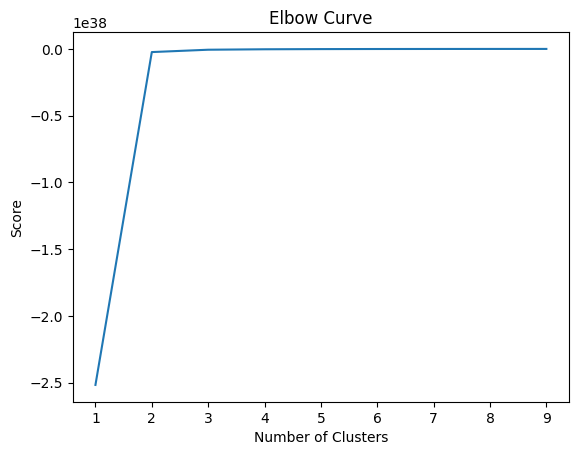

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

COMMENT: There's a large jump from one to two on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is two.

***5. K-means Clustering***

In [16]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 2)

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [18]:
df_num['clusters'] = kmeans.fit_predict(df_num)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df_num.head()

,id,host_resp_rate_pct,host_accept_rate_pct,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price_usd,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,clusters
0,144978,100,89,9,37.79233,-122.42431,1,1.0,1.0,55.0,30,365,7,24,54,54,120,0,0,4.68,4.78,4.45,4.86,4.81,4.81,4.66,9,4,5,0,0.86,1
1,958,100,98,1,37.77028,-122.43317,3,1.0,2.0,194.0,2,30,1,15,35,161,371,57,2,4.86,4.93,4.92,4.95,4.88,4.98,4.76,1,1,0,0,2.28,1
2,5858,80,71,2,37.74474,-122.42089,4,2.0,2.0,235.0,30,60,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,1,1,0,0,0.67,1
3,8142,100,74,12,37.76555,-122.45213,1,1.0,1.0,56.0,32,90,30,60,90,365,9,1,0,4.67,4.44,4.44,4.78,4.78,4.67,4.67,12,0,12,0,0.09,1
4,8739,100,89,2,37.76030,-122.42197,3,1.0,1.0,129.0,1,26,15,41,71,161,761,25,1,4.91,4.94,4.94,4.95,4.96,4.93,4.74,2,0,2,0,4.68,1


In [20]:
df_num['clusters'].value_counts()

1    4576
0     690
Name: clusters, dtype: int64

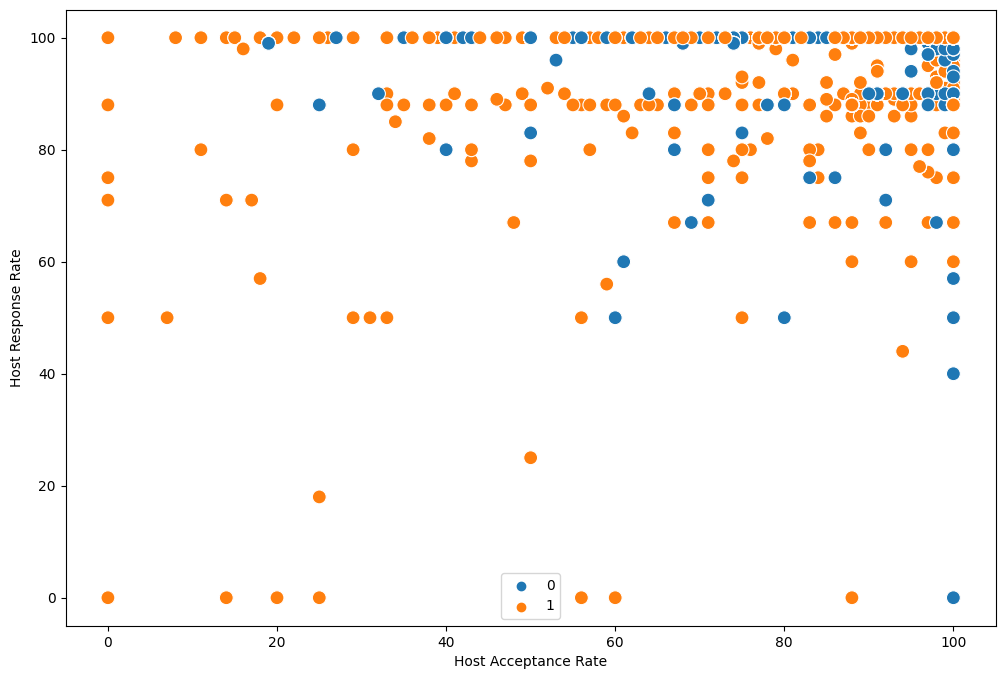

In [21]:
# Ploting the clusters for the host acceptance rate vs host reponse rate variables
# It's a mess and there are no distinct groups..!

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['host_accept_rate_pct'], y=df_num['host_resp_rate_pct'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Host Acceptance Rate') 
plt.ylabel('Host Response Rate') 
plt.show()

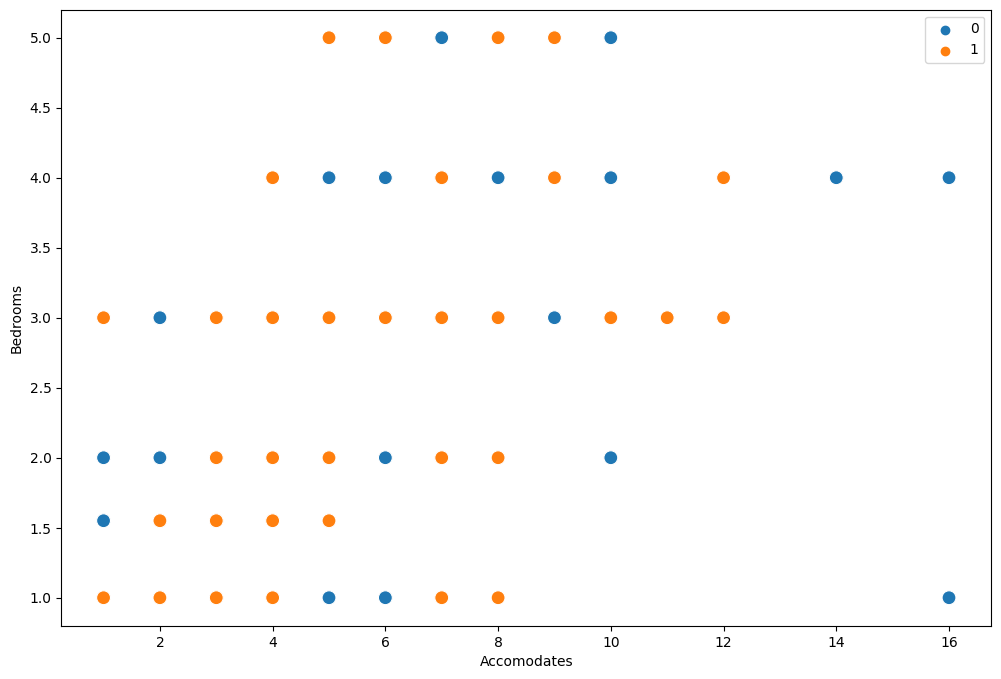

In [22]:
# Ploting the clusters for bedrooms vs accomodates variables
# Here the data is more organised but still no proper cluster groups appearing

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['accommodates'], y=df_num['bedrooms'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Accomodates') 
plt.ylabel('Bedrooms') 
plt.show()

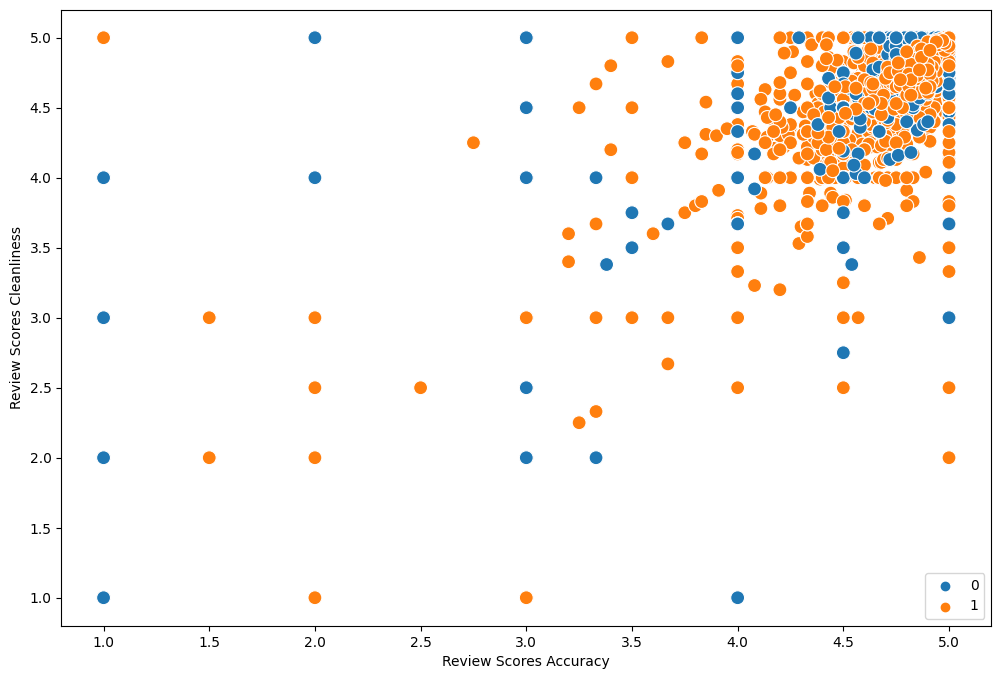

In [23]:
# Ploting the clusters for the review scores accuracy vs review scores cleanliness variables
# Here is a little bit more organised into groups but still nothing useful (star shaped data?)

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['review_scores_accuracy'], y=df_num['review_scores_cleanliness'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Review Scores Accuracy') 
plt.ylabel('Review Scores Cleanliness') 
plt.show()

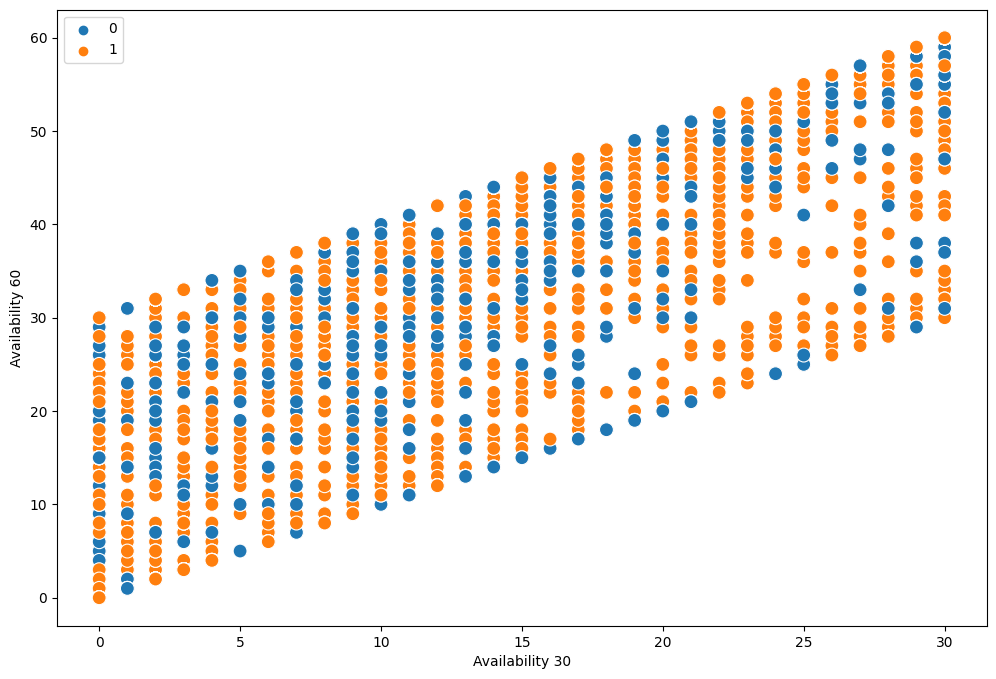

In [24]:
# Ploting the clusters for the availability 30 vs availability 60 variables
# A nice shape, but still no groups. 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['availability_30'], y=df_num['availability_60'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Availability 30') 
plt.ylabel('Availability 60') 
plt.show()

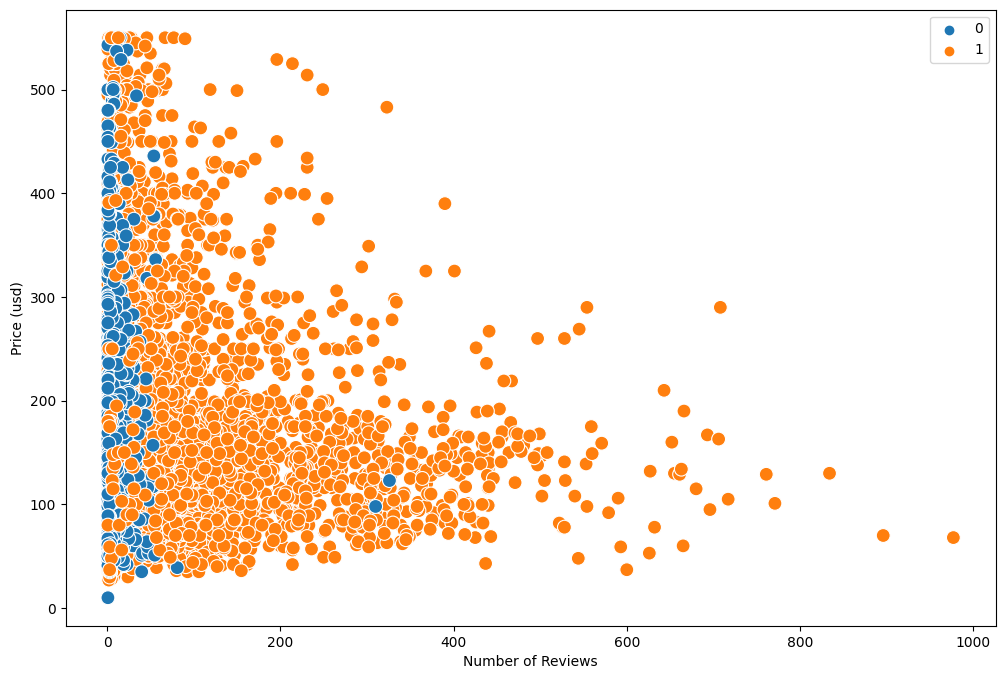

In [25]:
# Ploting the clusters for the number of reviews vs price variables
# Some very slight grouping appearing here

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['number_of_reviews'], y=df_num['price_usd'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Number of Reviews') 
plt.ylabel('Price (usd)') 
plt.show()

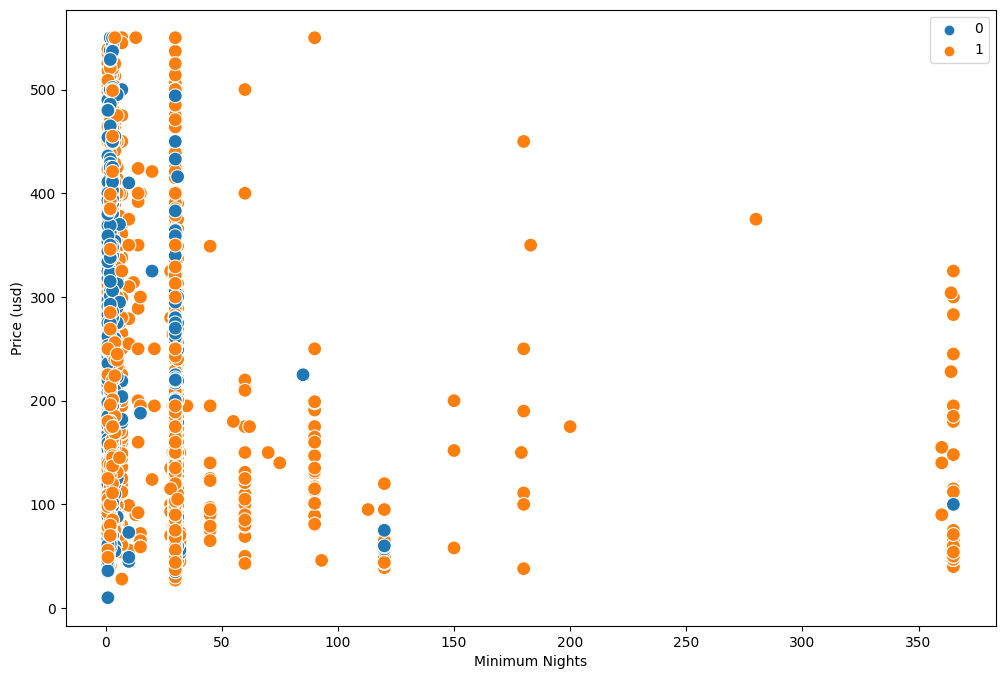

In [26]:
# Ploting the clusters for the minimum nights vs price variables
# Some very slight grouping appearing here

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['minimum_nights'], y=df_num['price_usd'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Minimum Nights') 
plt.ylabel('Price (usd)') 
plt.show()

# ***COMMENT:***

***I feel like the clusters don't make much sense. From my understanding, this means there are no groups in the data.***

***6. Descriptive Statistics***

In [27]:
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'pink'

In [28]:
df_num.groupby('cluster').agg(['mean', 'median', 'max', 'min'])

id                                    \
                     mean        median                 max   
cluster                                                       
dark purple  6.448123e+17  6.456967e+17  766962036540009367   
pink         2.643033e+07  2.493114e+07            54398958   

                                host_resp_rate_pct                  \
                            min               mean median  max min   
cluster                                                              
dark purple  501394289200405658          97.804348  100.0  100   0   
pink                        958          96.018794  100.0  100   0   

            host_accept_rate_pct                 host_listings_count         \
                            mean median  max min                mean median   
cluster                                                                       
dark purple            91.969565   99.0  100   0           35.927536    2.0   
pink                   88.584353   97.0  100   0           70.653409    3.0   

                        latitude                                  longitude  \
              max min       mean     median       max       min        mean   
cluster                                                                       
dark purple  4559   1  37.763601  37.765797  37.80881  37.70912 -122.434003   
pink         4559   1  37.766487  37.769440  37.80954  37.70837 -122.431447   

                                             accommodates                 \
                median        max        min         mean median max min   
cluster                                                                    
dark purple -122.42486 -122.35848 -122.50906     3.388406    3.0  16   1   
pink        -122.42409 -122.36903 -122.51136     2.972465    2.0  14   1   

             bedrooms                       beds                    \
                 mean median  max  min      mean median   max  min   
cluster                                                              
dark purple  1.561522    1.0  5.0  1.0  1.835652    1.0  16.0  1.0   
pink         1.466259    1.0  5.0  1.0  1.706687    1.0  10.0  1.0   

              price_usd                     minimum_nights                  \
                   mean median    max   min           mean median  max min   
cluster                                                                      
dark purple  184.617391  150.0  550.0  10.0      11.565217    2.0  365   1   
pink         171.785839  141.0  550.0  27.0      19.894449    5.0  365   1   

            maximum_nights                    availability_30                 \
                      mean median     max min            mean median max min   
cluster                                                                        
dark purple     311.020290  180.0    1125   3       13.939130   13.0  30   0   
pink            674.612981  160.0  999999   1       12.893138   11.0  30   0   

            availability_60                availability_90                 \
                       mean median max min            mean median max min   
cluster                                                                     
dark purple       31.624638   32.0  60   0       51.395652   58.0  90   0   
pink              28.866477   30.0  60   0       46.689904   52.0  90   0   

            availability_365                 number_of_reviews              \
                        mean median  max min              mean median  max   
cluster                                                                      
dark purple       176.531884  153.0  365   0          9.959420    4.0  326   
pink              169.317745  162.0  365   0         69.113418   22.0  977   

                number_of_reviews_ltm                 number_of_reviews_l30d  \
            min                  mean median  max min                   mean   
cluster                                                                        
dark purple   1        

# ***COMMENT:***

***It looks like 2 randomized groups, with similar attributes. Maybe I have too many variables?***

***I'm not sure if the dataset presents no interesting groups and/or correlations, or if I haven't found them. There are many variables, but maybe it would be worth building profiles of similar Airbnbs before looking for further correlations. Also I feel like some of the categorical variables could present interesting findings, but are not being used through these regression analysis & k-means clusterings.***

***7. Exporting Data***

In [29]:
df_num['clusters'].value_counts()

1    4576
0     690
Name: clusters, dtype: int64

In [30]:
# Exporting dataframe as it contains the cluster flag

df_num.to_csv('listings_clusters.csv', index=False)